In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

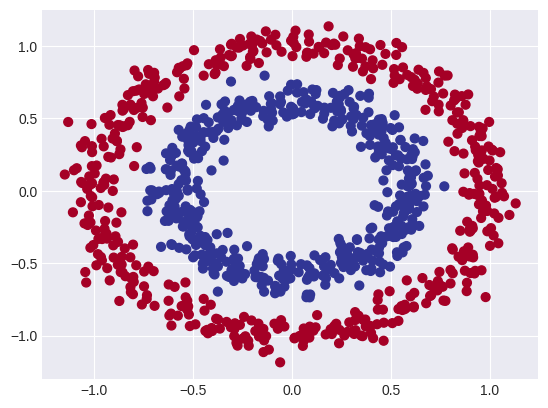

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.07, factor=0.6)
X, y = torch.Tensor(X), torch.Tensor(y)

plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [5]:
torch.manual_seed(12)

class CirclesModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1)
        )
    
    def forward(self, X):
        return self.network.forward(X)

model = CirclesModelV1()

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.8)

In [6]:
epochs = 500

for epoch in range(epochs):
    model.train(True)
    y_pred = model.forward(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad(True)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.6994429230690002
Epoch: 100 | Loss: 0.5346047878265381
Epoch: 200 | Loss: 0.19394847750663757
Epoch: 300 | Loss: 0.09606532752513885
Epoch: 400 | Loss: 0.059436578303575516


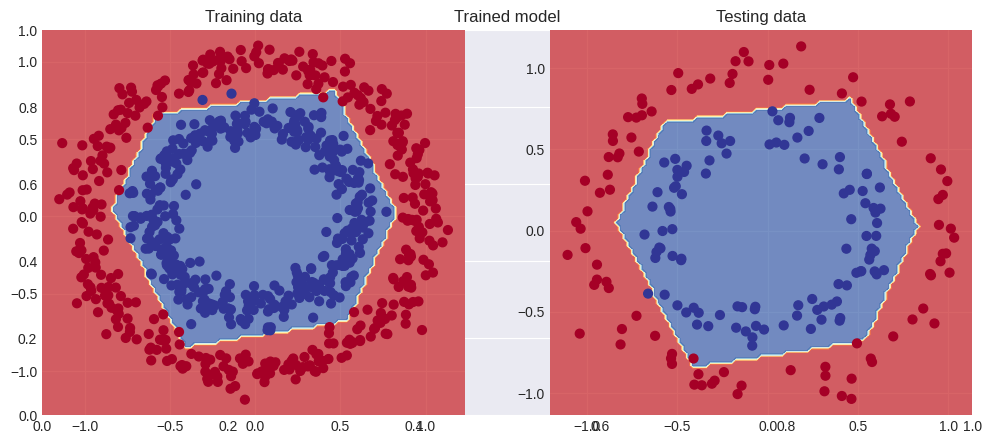

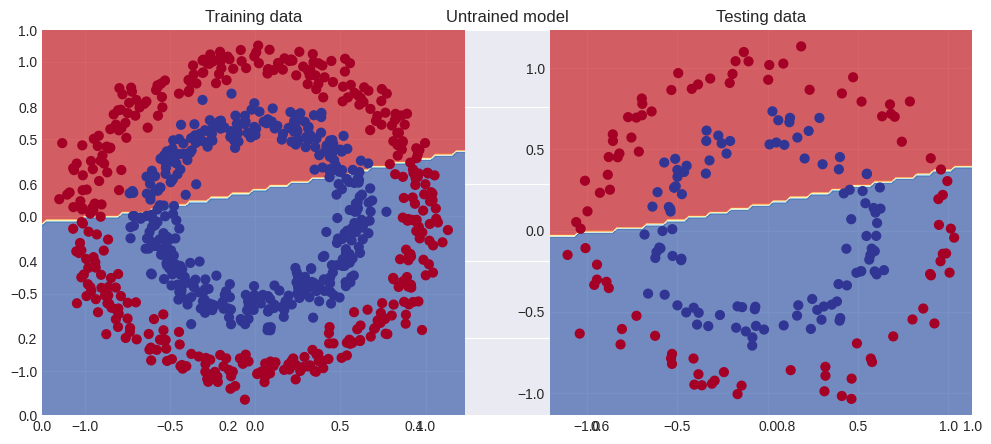

In [7]:
torch.manual_seed(12)
untrained_model = CirclesModelV1()

plt.figure(figsize=(12, 5))
plt.title("Trained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model, X_test, y_test)
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Untrained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(untrained_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(untrained_model, X_test, y_test)
plt.show()